In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.api import qqplot
from sklearn.linear_model import LinearRegression
import scipy.stats as st

# بارگزاری دیتا


<div dir='rtl'>
با استفاده از کتابخانه ی pandas برای بارگزاری داده ها استفاده می کنیم.
</div>

In [ ]:
df = pd.read_csv('/Mafia.csv')
df.head()

,Marijuana,Amephtamine
0,12.177676,38.337974
1,-11.456290,-26.370542
2,10.152620,30.428883
3,11.010183,39.668491
4,-1.260112,3.067233


# مدیریت داده‌های پرت

<div dir='rtl'>
ابتدا باید تعداد داده های null را پیدا کنیم؛
خوشبختانه داده ی null وجود ندارد
مرحله ی بعدی مدیریت داده های پرت است که برای این کار از روش z-scores استفاده می کنیم.
بعد از پیدا کدن داده های پرت به علت اینکه تعداد کمی دارد آن ها را عضو خنثی (صفر) جایگزین می کنیم.
</div>

In [ ]:
print(df.isnull().sum())

# z-score
def zscore_outlier(data):
  outliers = []
  threshold=3
  mean_1 = np.mean(data)
  std_1 =np.std(data)
  for y in data:
    z_score = (y - mean_1)/std_1
    if np.abs(z_score) > threshold:
      outliers.append(y)
  return outliers

print(zscore_outlier(df['Marijuana']))
print(zscore_outlier(df[' Amephtamine'] ))

Marijuana       0
 Amephtamine    0
dtype: int64
[-33.36835494545019]
[-74.16301088744649, -63.429668465325776]


In [ ]:
df["Marijuana"] = df["Marijuana"].replace({ -33.36835494545019: 0 })
df[" Amephtamine"] = df[" Amephtamine"].replace({ -74.16301088744649: 0 ,-63.429668465325776 : 0 })

# تست نرمالیتی

<div dir='rtl'>
با استفاده از qq-plot تست شارپینو برای مشخص کردن نرمالیتی استفاده می کنیم
</div>

Marijuana Sharpino Test
 stat=0.998, p=0.203
Amephtamine Sharpino Test
 stat=0.998, p=0.203


<Figure size 540x360 with 0 Axes>

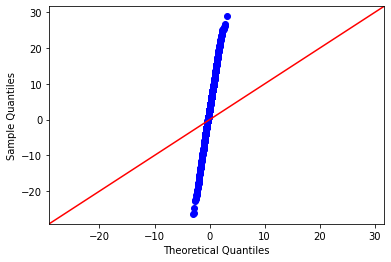

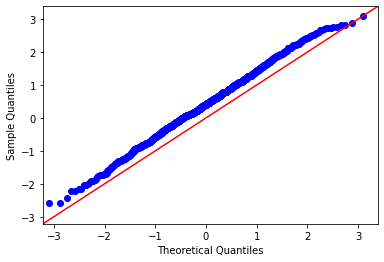

In [ ]:
## Sharpino Test
stat1, p1 = st.shapiro( df["Marijuana"] )
print('Marijuana Sharpino Test\n stat=%.3f, p=%.3f' % (stat1, p1))

stat2, p2 = st.shapiro( df[" Amephtamine"] )
print('Amephtamine Sharpino Test\n stat=%.3f, p=%.3f' % (stat2, p2))

plt.figure(dpi=90)
qqplot(df['Marijuana'], line='45');
df[' Amephtamine'] = (df['Marijuana'] - df[' Amephtamine'].mean()) / df['Marijuana'].std();
qqplot(df[' Amephtamine'], line='45');

# تشخیص هم‌بستگی دو متغیر نسبت به هم

<div dir='rtl'>
با استفاده از ضریب همبستگی پیرسون و جدول heat-map میزان همبستگی بین دو ستون جدول را پیدا می کنیم.
</div>

Pearson
 stat=1.000, p=0.000


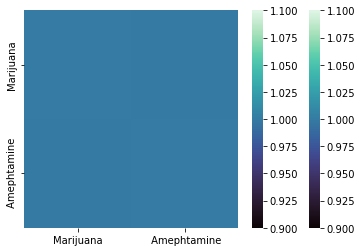

In [ ]:
stat, p = st.pearsonr( df['Marijuana'] , df[' Amephtamine'] )

print('Pearson\n stat=%.3f, p=%.3f' % (stat, p))


sns.heatmap(df.corr(), cmap='mako');
df.drop(' Amephtamine', axis=1, inplace= False)
sns.heatmap(df.corr(), cmap='mako');

# فیت کردن و ارزیابی رگرسیون

<div dir='rtl'>
بعد از انجام تست های خواسته شده حالا زمان ساخت مدل رگرسیون است
</div>

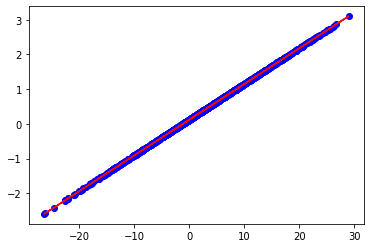

In [ ]:
linReg = LinearRegression()
Marijuana = df['Marijuana']
Amephtamine = df[' Amephtamine']
linReg.fit( Marijuana.values.reshape(-1,1), Amephtamine)
y_hat = linReg.predict(Marijuana.values.reshape(-1,1))
plt.scatter(Marijuana , Amephtamine, color='blue')
plt.plot(Marijuana , y_hat, color="red")

# ارزیابی مدل

<div dir='rtl'>
بعد از ساخت مدل باید مدل را ارزیابی کنیم که آیا مدل خوب و دقیقی ساخته ایم یا نه
</div>

-0.7554320598376603

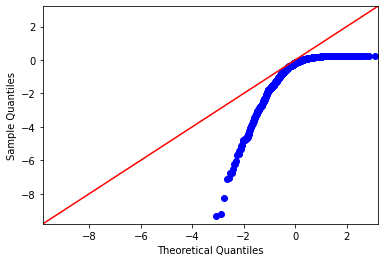

In [ ]:
y = Amephtamine.values
MSEs = y - y_hat ** 2
qqplot(MSEs, line='45');
np.mean(MSEs)

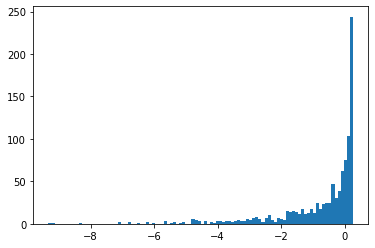

In [ ]:
plt.hist(MSEs, bins=100);